In [1]:
import pickle

with open("../data/X.pkl", "rb") as f:
    X = pickle.load(f)

with open("../data/y.pkl", "rb") as f:
    y = pickle.load(f)

print("loaded X shape", X.shape)
print("loaded y shape", y.shape)

loaded X shape (5169, 1024)
loaded y shape (5169,)


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
import numpy as np

model = RandomForestRegressor(n_estimators=200, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("cross-validated r2:", round(np.mean(r2_scores), 3))

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred,))

rmse_scorer = make_scorer(rmse, greater_is_better=False)
rmse_scores = cross_val_score(model, X, y, cv=5, scoring=rmse_scorer)
print("cross-validated RMSE:", round(-np.mean(rmse_scores),3))

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mae_scores = cross_val_score(model, X, y, cv=5, scoring=mae_scorer)
print("cross-validated MAE:", round(-np.mean(mae_scores),3))

cross-validated r2: 0.226
cross-validated RMSE: 1.019
cross-validated MAE: 0.806


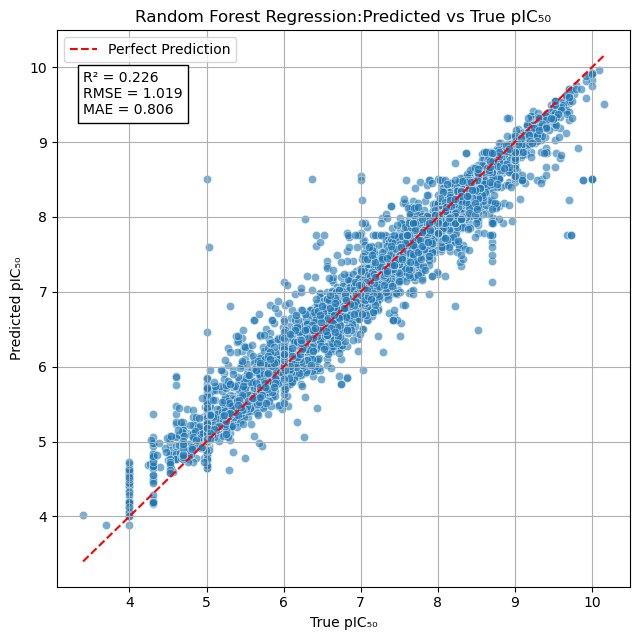

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import os

model.fit(X, y)
y_pred = model.predict(X)

r2 = np.mean(r2_scores)
rmse = -np.mean(rmse_scores)
mae = -np.mean(mae_scores)

os.makedirs("../plots", exist_ok=True)

plt.figure(figsize=(6.5, 6.5))
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
plt.plot([min(y), max(y)], [min(y), max(y)], '--', color='red', label='Perfect Prediction')

plt.xlabel("True pIC₅₀")
plt.ylabel("Predicted pIC₅₀")
plt.title("Random Forest Regression:Predicted vs True pIC₅₀")

plt.text(min(y), max(y) - 0.2,
         f"R² = {r2:.3f}\nRMSE = {rmse:.3f}\nMAE = {mae:.3f}",
         fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))

plt.legend()
plt.grid(True)
plt.tight_layout()

model_name = "random_forest"  
plt.savefig(f"../plots/pred_vs_true_{model_name}.png", dpi=300)
plt.show()

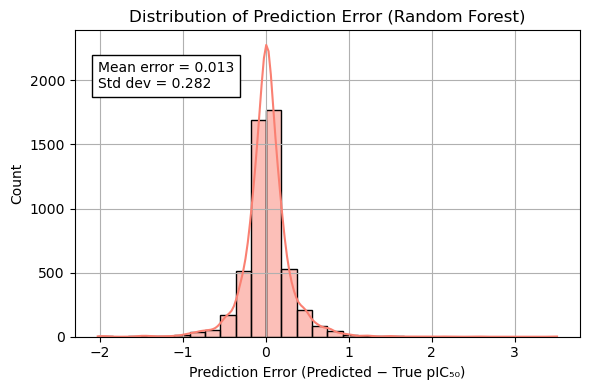

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

model.fit(X, y)
y_pred = model.predict(X)

error = y_pred - y

mean_err = np.mean(error)
std_err = np.std(error)

os.makedirs("../plots", exist_ok=True)

plt.figure(figsize=(6,4))
sns.histplot(error, bins=30, kde=True, color='salmon')
plt.xlabel("Prediction Error (Predicted − True pIC₅₀)")
plt.title("Distribution of Prediction Error (Random Forest)")
plt.grid(True)
plt.tight_layout()

plt.text(x=min(error), y=plt.ylim()[1]*0.9, 
         s=f"Mean error = {mean_err:.3f}\nStd dev = {std_err:.3f}",
         bbox=dict(facecolor='white', edgecolor='black'),
         fontsize=10, verticalalignment='top')

plt.savefig("../plots/RF:prediction_error_distribution.png", dpi=300)
plt.show()

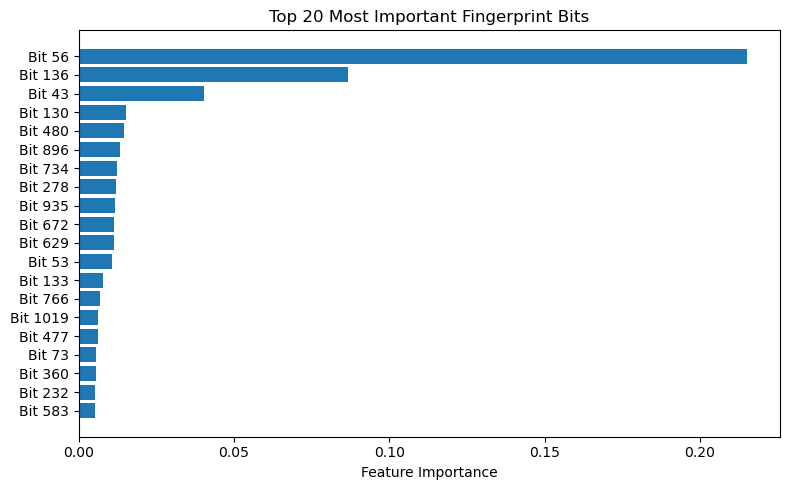

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os

model.fit(X, y)
importances = model.feature_importances_

top_idx = np.argsort(importances)[-20:]

plt.figure(figsize=(8, 5))
plt.barh(range(len(top_idx)), importances[top_idx], align='center')
plt.yticks(range(len(top_idx)), [f"Bit {i}" for i in top_idx])
plt.xlabel("Feature Importance")
plt.title("Top 20 Most Important Fingerprint Bits")
plt.tight_layout()

plt.savefig("../plots/fingerprint_feature_importance.png", dpi=300)
plt.show()